In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

Categorical variable encoding

In [14]:
# Example: Red = 0, Green = 1, Blue = 2
color = ['red', 'green', 'blue']
encoded = [0, 1, 2]

One Hot Encoding: with OneHotEncoder

In [15]:
X = np.array([['red'], ['green'], ['blue'], ['green']])

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

print(X_encoded)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


One Hot Encoding: with pandas.get_dummies()

In [16]:
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'green']})
pd.get_dummies(df)


,color_blue,color_green,color_red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,True,False


Binning (Discretization)

In [5]:
# Sample continuous feature (e.g., income)
X = np.array([[15], [35], [50], [65], [80], [95]])

# Apply binning
binner = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform')
X_binned = binner.fit_transform(X)

print(X_binned)
print("Bin edges:", binner.bin_edges_)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Bin edges: [array([15., 35., 55., 75., 95.])]


Polynomial Features & Feature Interactions

In [8]:
X = np.array([[2, 3]])  # Two original features

# Create degree-2 polynomial and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original features:", X)
print("Transformed features:", X_poly)
print("Feature names:", poly.get_feature_names_out())

Original features: [[2 3]]
Transformed features: [[2. 3. 4. 6. 9.]]
Feature names: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


Univariate Nonlinear Transformations:Log Transform

In [9]:
# Simulated skewed feature (e.g., income)
X = np.array([[10], [100], [1000], [10000]])

# Apply log10 transformation
X_log = np.log10(X + 1)  # Add 1 to avoid log(0)
print(X_log)


[[1.04139269]
 [2.00432137]
 [3.00043408]
 [4.00004343]]


Univariate Nonlinear Transformations: With Scikit-Learn: FunctionTransformer

In [26]:
# Wrap any numpy function
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log(x + 1)
X_transformed = log_transformer.fit_transform(X)

Visualizing the Impact

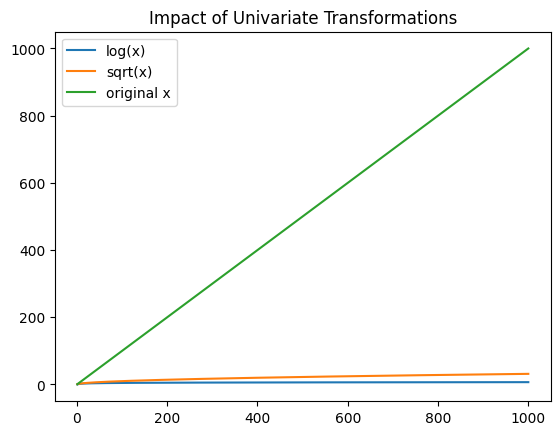

In [27]:
import matplotlib.pyplot as plt
x = np.linspace(1, 1000, 1000)
plt.plot(x, np.log(x), label="log(x)")
plt.plot(x, np.sqrt(x), label="sqrt(x)")
plt.plot(x, x, label="original x")
plt.legend()
plt.title("Impact of Univariate Transformations")
plt.show()
